In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
Product_reviews = pd.read_csv('AllProductReviews.csv')
Product_reviews

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255
...,...,...,...,...
14332,Good\n,Good\n,4,JBL T110BT
14333,Amazing Product\n,An amazing product but a bit costly.\n,5,JBL T110BT
14334,Not bad\n,Sound\n,1,JBL T110BT
14335,a good product\n,the sound is good battery life is good but the...,5,JBL T110BT


In [ ]:
Product_reviews.isnull().sum()

ReviewTitle    0
ReviewBody     0
ReviewStar     0
Product        0
compound       0
neg            0
ps             0
neu            0
pos            0
dtype: int64

In [ ]:
Product_reviews

'boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Rockerz 255boAt Ro

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentimentanalyser = SentimentIntensityAnalyzer()

Product_reviews['compound'] = [sentimentanalyser.polarity_scores(review)['compound'] for review in Product_reviews['ReviewBody']]
Product_reviews['neg'] = [sentimentanalyser.polarity_scores(review)['neg'] for review in Product_reviews['ReviewBody']]
Product_reviews['pos'] = [sentimentanalyser.polarity_scores(review)['pos'] for review in Product_reviews['ReviewBody']]
Product_reviews['neu'] = [sentimentanalyser.polarity_scores(review)['neu'] for review in Product_reviews['ReviewBody']]




In [ ]:
Product_reviews[['compound','pos','neg','neu']].describe()

,compound,pos,neg,neu
count,14337.000000,14337.000000,14337.000000,14337.000000
mean,0.291772,0.272829,0.080117,0.646634
std,0.524008,0.268122,0.142136,0.244835
min,-0.974200,0.000000,0.000000,0.000000
25%,0.000000,0.043000,0.000000,0.518000
50%,0.440400,0.206000,0.000000,0.691000
75%,0.734200,0.420000,0.116000,0.811000
max,0.998600,1.000000,1.000000,1.000000


<Axes: xlabel='compound', ylabel='Count'>

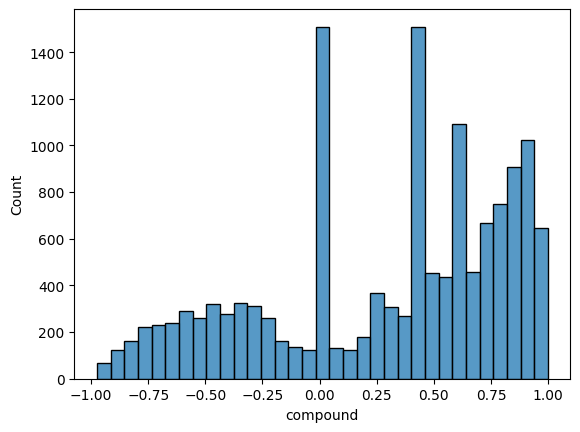

In [ ]:
sns.histplot(Product_reviews['compound'])

<Axes: xlabel='neg', ylabel='Count'>

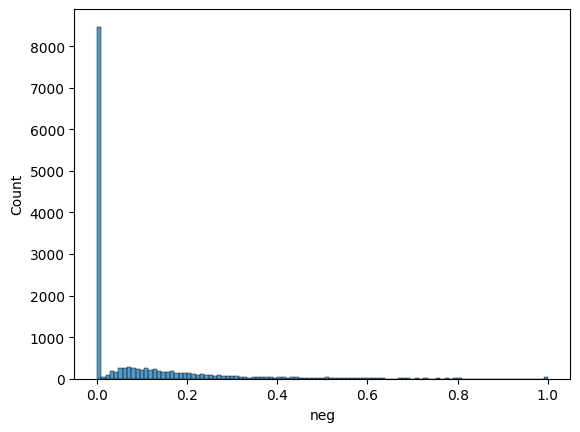

In [ ]:
sns.histplot(Product_reviews['neg'])

<Axes: xlabel='pos', ylabel='Count'>

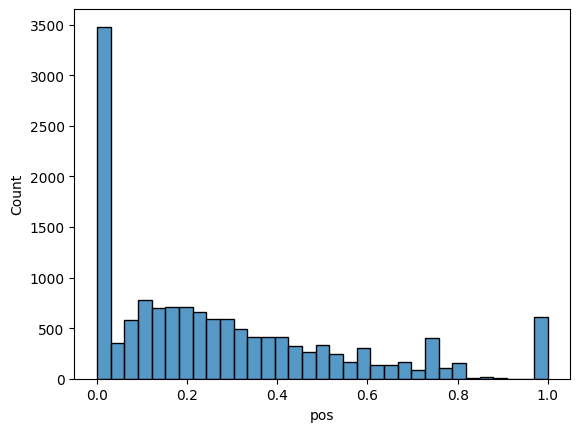

In [ ]:
sns.histplot(Product_reviews['pos'])

In [ ]:
negative_reviews = (Product_reviews['compound']<=0).groupby(Product_reviews['Product']).sum()
negative_reviews

Product
Flybot Beat                 4
Flybot Boom                12
Flybot Wave                57
JBL T110BT                977
JBL T205BT                652
PTron Intunes              75
Samsung EO-BG950CBEIN      81
Sennheiser CX 6.0BT      1260
Skullcandy S2PGHW-174      96
boAt Rockerz 255         1748
Name: compound, dtype: int64

In [ ]:
products = Product_reviews['Product'].value_counts()
products

boAt Rockerz 255         5000
Sennheiser CX 6.0BT      5000
JBL T110BT               1922
JBL T205BT               1411
PTron Intunes             254
Skullcandy S2PGHW-174     239
Samsung EO-BG950CBEIN     224
Flybot Wave               182
Flybot Boom                82
Flybot Beat                23
Name: Product, dtype: int64

In [ ]:
proportion_negative = pd.DataFrame((Product_reviews['compound']<0).groupby(Product_reviews['Product']).sum()
                                    /Product_reviews['Product'].groupby(Product_reviews['Product']).count()*100,
                                   columns=['% negative']).sort_values(by='% negative')




proportion_negative


,% negative
Product,
Flybot Beat,8.695652
Flybot Boom,10.975610
Sennheiser CX 6.0BT,16.980000
PTron Intunes,17.716535
Flybot Wave,21.428571
Samsung EO-BG950CBEIN,21.428571
boAt Rockerz 255,26.680000
Skullcandy S2PGHW-174,30.543933
JBL T205BT,32.388377


AttributeError: ignored

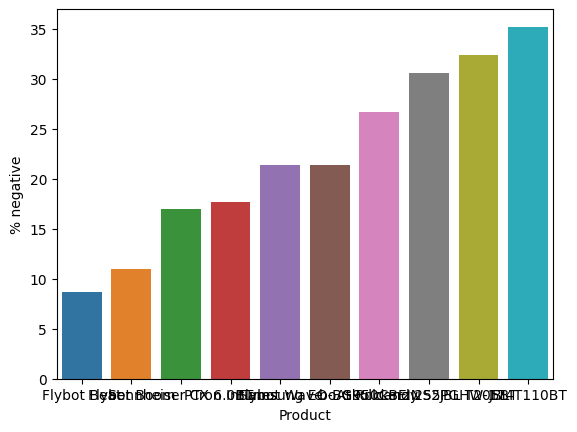

In [ ]:
sns.barplot(data=proportion_negative, x=proportion_negative.index, y='% negative')


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

def preprocessing(text):
  tokenised_d = nltk.tokenize.RegexpTokenizer('[a-zA-z0-9\']+').tokenize(text)
  cleaning = [word.lower() for word in tokenised_d if word.lower() not in stopwords]
  stemming = [nltk.stem.PorterStemmer().stem(word) for word in cleaning]
  return stemming





In [ ]:
Product_reviews['processing_reviews'] = Product_reviews['ReviewBody'].apply(preprocessing)
reviews_positive = Product_reviews.loc[(Product_reviews['Product']== "JBL T110BT") & Product_reviews['compound']>0,:]
reviews_negative = Product_reviews.loc[Product_reviews['compound']<0 & (Product_reviews['Product']== "JBL TT110BT"),:]
reviews_negative

,ReviewTitle,ReviewBody,ReviewStar,Product,processing_reviews,compound,neg,pos,neu
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,"[doubt, great, bass, great, extent, nois, canc...",-0.9580,0.268,0.075,0.657
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,"[earphon, unreli, bought, 15, day, meanwhil, r...",-0.2528,0.073,0.043,0.884
7,Great sound with worst mic.\n,After one month usage reviewing this .Pros-1- ...,3,boAt Rockerz 255,"[one, month, usag, review, pro, 1, sound, qual...",-0.5849,0.132,0.000,0.868
9,Very very bad Durabity\n,The product durability is 1 month..I just lost...,1,boAt Rockerz 255,"[product, durabl, 1, month, lost, bill, detail...",-0.6076,0.123,0.064,0.813
13,Product not good quality\n,Product stopped working in a month time\n,1,boAt Rockerz 255,"[product, stop, work, month, time]",-0.2263,0.275,0.000,0.725
...,...,...,...,...,...,...,...,...,...
14322,Bad bass quality\n,No bass\n,2,JBL T110BT,[bass],-0.2960,0.688,0.000,0.312
14323,Good products for watching videos\n,Bluetooth contacts missing\n,5,JBL T110BT,"[bluetooth, contact, miss]",-0.2960,0.524,0.000,0.476
14329,It's from jbl or road side product!? Magic ...,Don't buy it it's horrible not connecting with...,1,JBL T110BT,"[buy, horribl, connect, phone, connect, automa...",-0.8955,0.271,0.000,0.729
14330,Ok\n,Very bad\n,2,JBL T110BT,[bad],-0.5849,0.791,0.000,0.209


   good product   sound qualiti    bass    work     jbl batteri     use earphon 
    703     578     575     523     308     261     242     233     200     186 


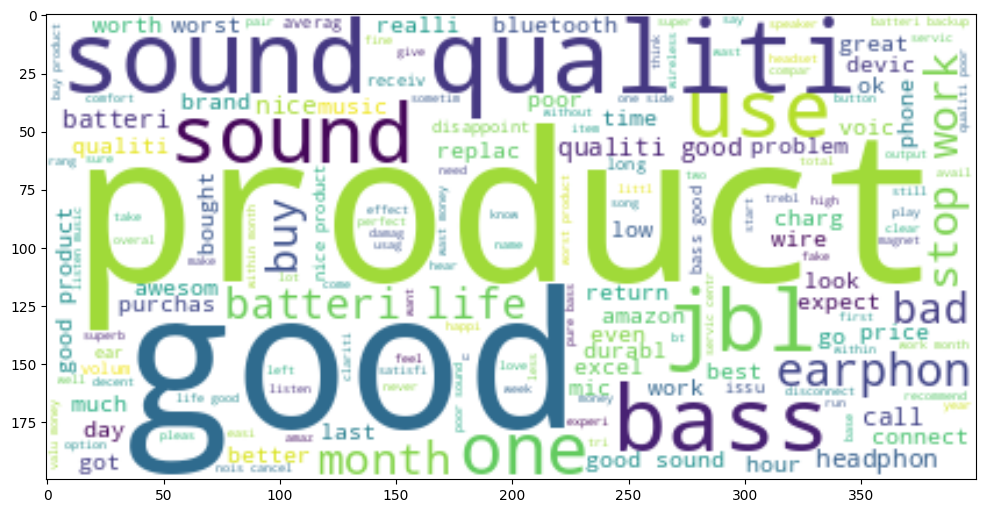

In [ ]:
pos_token = [word for review in reviews_positive['processing_reviews'] for word in review]

from nltk.probability import FreqDist

pos_freq = FreqDist(pos_token)
pos_freq.tabulate(10)


cloudword = WordCloud(background_color = 'white',).generate_from_text(
    ' '.join(pos_token))

plt.figure(figsize=(12,12))
plt.imshow(cloudword,interpolation='bilinear')
plt.axis=("off")
plt.show()

product qualiti   sound    good    work     use earphon     one   month    bass 
   1405    1402    1366    1078     859     660     639     595     561     542 


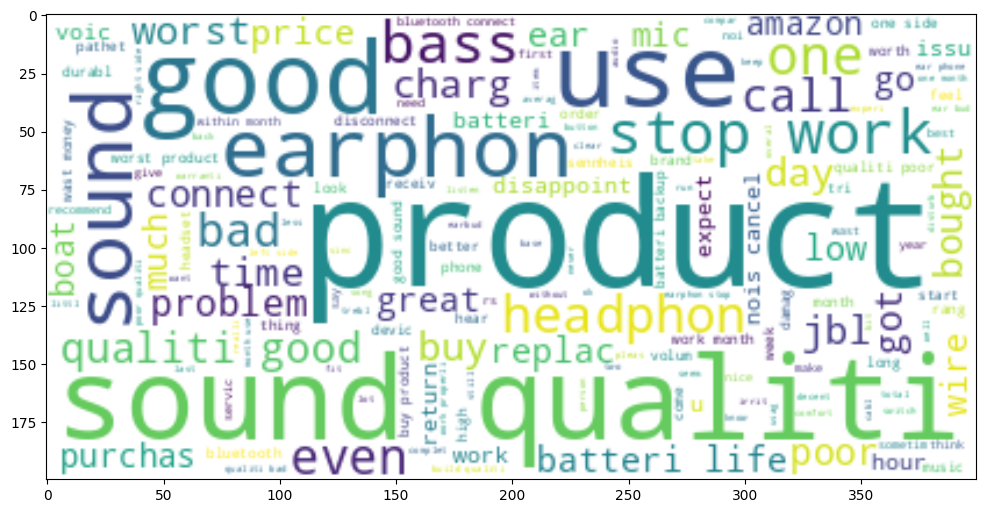

In [ ]:
neg_token = [word for review in reviews_negative['processing_reviews'] for word in review]

from nltk.probability import FreqDist

neg_freq = FreqDist(neg_token)
neg_freq.tabulate(10)


cloudword = WordCloud(background_color = 'white',).generate_from_text(
    ' '.join(neg_token))

plt.figure(figsize=(12,12))
plt.imshow(cloudword,interpolation='bilinear')
plt.axis=("off")
plt.show()